# This notebook is made for the sampling problems

Here is the link: [Handbook for hypothesis test](https://www.itl.nist.gov/div898/handbook/pmc/section2/pmc24.htm)

## Single Sample hypothesis test

 **Choosing a Sampling Plan with a given OC Curve**

The probability of observing exactly d defectives is given by:

$P_d = f(d) = \frac{n!}{d!(n-d)!} \cdot{p^d}\cdot{(1-p)}^{(n-d)}$ 

Using this formula with $n=52,\ c=2,\ and\ p=0.01,0.02,…,0.12$, which means that we default believe $P_d = p$.

The probability of acceptance is the probability that d, the number of defectives, is less than or equal to c, the accept number. This means that:

$P_a = P(d\le c) = \sum_{d=0}^{c}\frac{n!}{d!(n-d)!} \cdot{p^d}\cdot{(1-p)}^{(n-d)}$, then we find:

In [1]:
import numpy as np
import pandas as pd
p_list = []
n = 52
c = 2
for i in range (1,13):
    p_list.append(i/100)
p_d_list = []
p_a_list = []
for i in range (0,len(p_list)):
    #p_d = sum(np.random.binomial(52,p_list[i],50000)==3)/50000
    accpet = sum(np.random.binomial(n,p_list[i],50000)<=c)
    p_a = (accpet)/50000 
    p_a_list.append(p_a)
   # p_a_list.append(p_a)
p_dic = {'P_a':p_a_list,'P_d':p_list}
df =pd.DataFrame(p_dic)
df

,P_a,P_d
0,0.98470,0.01
1,0.91518,0.02
2,0.79778,0.03
3,0.65416,0.04
4,0.51260,0.05
5,0.38862,0.06
6,0.28580,0.07
7,0.20364,0.08
8,0.14170,0.09
9,0.09700,0.10


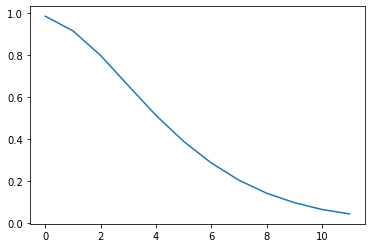

In [2]:
import matplotlib.pyplot as plt 
plt.plot( p_a_list)

We define $\alpha$ and $\beta$ as following:

$1-\alpha = \sum_{d=0}^{c}\frac{n!}{d!(n-d)!} \cdot{p^{d}_{1}}\cdot{(1-p_{1})}^{(n-d)}$

$\beta = \sum_{d=0}^{c}\frac{n!}{d!(n-d)!} \cdot{p^{d}_{2}}\cdot{(1-p_2)}^{(n-d)}$

$p_1$ is a percent defective that is the base line requirement for the quality of the producer's product.

$p_2$is a designated high defect level that would be unacceptable to the consumer.

In [3]:
alpha_list = []
for i in range (0,len(p_a_list)):
    alpha_list.append(1 - p_a_list[i])
p_dic['alpha'] = alpha_list
df =pd.DataFrame(p_dic)
df

,P_a,P_d,alpha
0,0.98470,0.01,0.01530
1,0.91518,0.02,0.08482
2,0.79778,0.03,0.20222
3,0.65416,0.04,0.34584
4,0.51260,0.05,0.48740
5,0.38862,0.06,0.61138
6,0.28580,0.07,0.71420
7,0.20364,0.08,0.79636
8,0.14170,0.09,0.85830
9,0.09700,0.10,0.90300


**Average Outgoing Quality (AOQ)**

AOQ can be understood as the defective proportion after we exclude the defective by using single sampling 

$AOQ = \frac{p_a \cdot p \cdot {(N-n)}}{N}$

We assume that$ N=10000,\ n=52,\ c=2,$

In [4]:
aoq_list = []
N = 10000
for i in range (0,len(p_a_list)):
    aoq = (p_a_list[i]*p_list[i]*(N-n))/N
    aoq_list.append(aoq)
p_dic['AOQ'] = aoq_list
df =pd.DataFrame(p_dic)
df

,P_a,P_d,alpha,AOQ
0,0.98470,0.01,0.01530,0.009796
1,0.91518,0.02,0.08482,0.018208
2,0.79778,0.03,0.20222,0.023809
3,0.65416,0.04,0.34584,0.026030
4,0.51260,0.05,0.48740,0.025497
5,0.38862,0.06,0.61138,0.023196
6,0.28580,0.07,0.71420,0.019902
7,0.20364,0.08,0.79636,0.016206
8,0.14170,0.09,0.85830,0.012687
9,0.09700,0.10,0.90300,0.009650


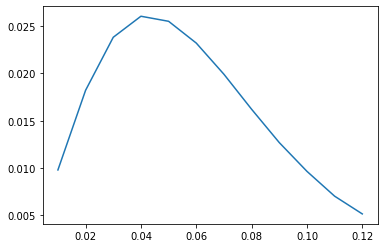

In [5]:
plt.plot( p_list, aoq_list)

Our conclusion is that when $N \gg n$, then we can find that $AOQ \approx P_a \cdot p$

**The Average Total Inspection (ATI)**

What is the total amount of inspection when rejected lots are screened?

$ATI = n + (1-P_a)(N-n)$

In [6]:
ati_list = []
for i in range (0,len(p_a_list)):
    ati = 52 + ((1 -p_a_list[i])*(10000-52))
    ati_list.append(ati)
p_dic['ATI'] = ati_list
df =pd.DataFrame(p_dic)
df

,P_a,P_d,alpha,AOQ,ATI
0,0.98470,0.01,0.01530,0.009796,204.20440
1,0.91518,0.02,0.08482,0.018208,895.78936
2,0.79778,0.03,0.20222,0.023809,2063.68456
3,0.65416,0.04,0.34584,0.026030,3492.41632
4,0.51260,0.05,0.48740,0.025497,4900.65520
5,0.38862,0.06,0.61138,0.023196,6134.00824
6,0.28580,0.07,0.71420,0.019902,7156.86160
7,0.20364,0.08,0.79636,0.016206,7974.18928
8,0.14170,0.09,0.85830,0.012687,8590.36840
9,0.09700,0.10,0.90300,0.009650,9035.04400


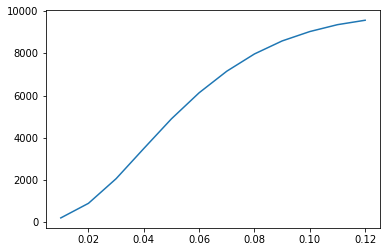

In [7]:
plt.plot( p_list, ati_list)

## Double Sample test

The number of defectives is then counted and compared to the first sample's acceptance number $a_1$ and rejection number is $r_1$. Denote the number of defectives in sample 1 by $d_1$.

The number of defectives is then counted and compared to the second sample's acceptance number $a_2$ and rejection number is $r_2$. Denote the number of defectives in sample 2 by $d_2$. $r_2 = a_2 + 1$

If $d_1 \le a_1$, the lot is accepted.

If $d_1 \ge r_1$, the lot is rejected.

If $a_1<d_1<r_1$, a second sample is taken.

If a second sample of size $n_2$ is taken, the number of defectives, $d_2$, is counted.

The total number of defectives is $D_2 = d_1 + d_2$

If $D2 \le a2$, the lot is accepted.
If $D2\ge r2$, the lot is rejected.

### For example ###

$n_1 = 50, n_2 = 100,\frac{c_2}{c_1} = 2,  c_1 =2 $

$p_1 = 0.01, p_2 = 0.05, \beta = 0.10$

**Then the probability of acceptance on the first sample, which is the chance of getting two or less defectives, refers to $P_1$.**

We define the Average Sample Number (ASN)to denote the sample number for double sample test.

In [8]:
n_1 = 50
n_2 = 100
c_1 = 2
c_2 = 6
p_list_a = []
p_list_b = []
for i in range (1,13):
    p_list_a.append(i/100)
    p_list_b.append(i/80)
p_d_list = []
p_a_list = []
for i in range (0,len(p_list)):
    #p_d = sum(np.random.binomial(52,p_list[i],50000)==3)/50000
    accpet_sample_def =sum(np.random.binomial(n_1,p_list_a[i],50000)<=c_1)
    p_a_1 = accpet_sample_def/50000 
    p_a_list.append(p_a_1)
   # p_a_list.append(p_a)
    decline_sample_2 =sum(np.random.binomial(n_2,p_list_b[i],50000)>c_2)
    p_d_list.append(1- decline_sample_2/50000) 
p_dic = {'Sample 1 accept':p_a_list,'Sample 2 decline':p_d_list,'Defective probability for 1':p_list_a,'Defective probability for 2':p_list_b}
df =pd.DataFrame(p_dic)
df

,Sample 1 accept,Sample 2 decline,Defective probability for 1,Defective probability for 2
0,0.98572,0.99972,0.01,0.0125
1,0.92084,0.98798,0.02,0.0250
2,0.81106,0.91870,0.03,0.0375
3,0.67904,0.76820,0.04,0.0500
4,0.54122,0.56100,0.05,0.0625
5,0.41790,0.36872,0.06,0.0750
6,0.30722,0.21564,0.07,0.0875
7,0.22638,0.11686,0.08,0.1000
8,0.15986,0.05742,0.09,0.1125
9,0.11098,0.02656,0.10,0.1250


,Sample 1 accept,Sample 2 decline,Defective probability for 1,Defective probability for 2,ASN
0,0.98572,0.99972,0.01,0.0125,51.428
1,0.92084,0.98798,0.02,0.0250,57.916
2,0.81106,0.91870,0.03,0.0375,68.894
3,0.67904,0.76820,0.04,0.0500,82.096
4,0.54122,0.56100,0.05,0.0625,95.878
5,0.41790,0.36872,0.06,0.0750,108.210
6,0.30722,0.21564,0.07,0.0875,119.278
7,0.22638,0.11686,0.08,0.1000,127.362
8,0.15986,0.05742,0.09,0.1125,134.014
9,0.11098,0.02656,0.10,0.1250,138.902


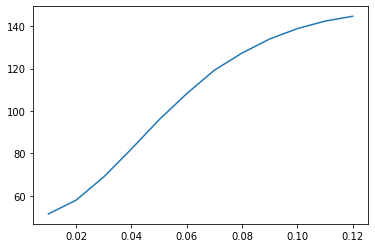

In [9]:
asn_list = []
for i in range (0,len(p_a_list)):
    asn_list.append((1 - p_a_list[i]) * n_2 + n_1)
p_dic['ASN'] = asn_list
df =pd.DataFrame(p_dic)
plt.plot(p_list, asn_list)
df

## Sequential Sampling Plan (SSSTP)

Sequential sampling is different from single, double or multiple sampling. Here one takes a sequence of samples from a lot. How many total samples looked at is a function of the results of the sampling process.

**An example:**

We assume that $p_1 = 0.01, p_2 = 0.1, \alpha = 0.05,\ and \ \beta = 0.1$

$x_a = -h_1 + s\cdot{n}$

$x_r = h_2 + s\cdot{n}$

$ k = \log \left[{\frac{p_{2}\cdot{(1-p_1)}}{p_1\cdot{(1-p_2)}}} \right]$

$h_1 = \frac{1}{k} \left[log{(\frac{1-\alpha}{\beta})} \right]$

$h_2 = \frac{1}{k} \left[log{(\frac{1-\beta}{\alpha})} \right]$

$s = \frac{1}{k} \left[ {log{(\frac{1-p_1}{1-p_2})}} \right]$

Text(0.5, 0, 'Inspect number')

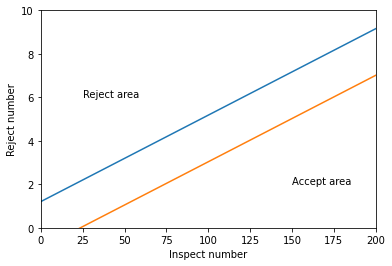

In [14]:
import math
def k(p_1,p_2):
    return math.log10((p_2*(1-p_1)/(p_1*(1-p_2))))
def s(p_1,p_2):
    k_value = k(p_1,p_2)
    s = (1/k_value)*math.log10((1-p_1)/(1-p_2))
    return s
def x_a(alpha,beta,n,p_1,p_2):
     k_value = k(p_1,p_2)
     s_value = s(p_1,p_2)
     x_a = (-(1/k_value)*math.log10((1-alpha)/beta) + s_value*n)
     return x_a
def x_r(alpha,beta,n,p_1,p_2):
     k_value = k(p_1,p_2)
     s_value = s(p_1,p_2)
     x_r = ((1/k_value)*math.log10((1-beta)/alpha) + s_value*n)
     return x_r
x_r_list = []
x_a_list = []
sample_size_list = []

for i in range (0,500,5):
    sample_size_list.append(i)
    x_r_list.append(x_r(0.05,0.1,i,0.01,0.1))
    x_a_list.append(x_a(0.05,0.1,i,0.01,0.1))
plt.plot(sample_size_list,x_r_list)
plt.plot(sample_size_list,x_a_list)
plt.text(25,6,"Reject area")
plt.text(150,2,"Accept area")
plt.ylim(0,10)
plt.xlim(0,200)
plt.ylabel("Reject number")
plt.xlabel("Inspect number")

In [ ]:
ssstp_dic ={'Accept threshold':x_a_list,'Reject threshold': x_r_list, 'Inspect amount': sample_size_list }
df = pd.DataFrame(ssstp_dic)
df

## Sequential Probability Ratio Test (SPRT)

$\log{\Lambda_{m}} = x_m \log \frac{p_1}{p_0} + (1-x_m) \log{\frac{1-p_1}{1-p_0}}$

$\log{\Lambda_{m}} = -\log{(\frac{\theta_{1}}{\theta_{0}}) + {\frac{\theta_{1} -\theta_{0}}{\theta_{1} \theta_{0}}x_m}}$

**Which one is corrent?**
[The formula](https://en.wikipedia.org/wiki/Sequential_probability_ratio_test)